# Analyse des films et séries de Netflix

## Import des données

In [41]:
import pandas as pd
import seaborn as sns
import numpy as np

# path to dataset
NETFLIX_FILE = './netflix.csv'

df = pd.read_csv(NETFLIX_FILE)

In [37]:
df.info

<bound method DataFrame.info of                                            Title  \
0                               Lets Fight Ghost   
1                            HOW TO BUILD A GIRL   
2                                     Centigrade   
3                                          ANNE+   
4                                          Moxie   
...                                          ...   
15475                     K-POP Extreme Survival   
15476            DreamWorks Shreks Swamp Stories   
15477  DreamWorks Happy Holidays from Madagascar   
15478                DreamWorks Holiday Classics   
15479   DreamWorks Kung Fu Panda Awesome Secrets   

                                        Genre  \
0      Crime, Drama, Fantasy, Horror, Romance   
1                                      Comedy   
2                             Drama, Thriller   
3                                       Drama   
4                     Animation, Short, Drama   
...                                       ...   


## Répartition Films/Séries

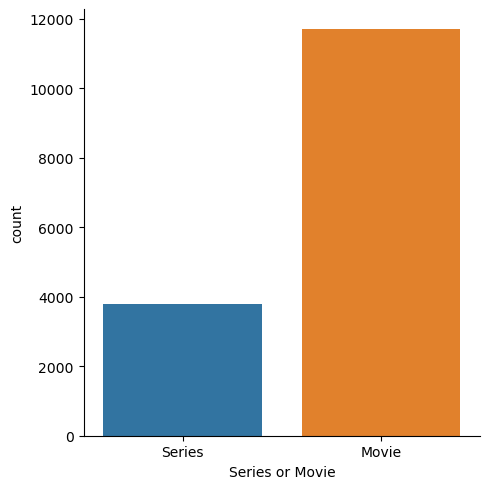

In [26]:
g = sns.catplot(data=df, kind="count", x="Series or Movie")
g.fig

## Sortie annuelles (sur Netflix)

In [27]:
ym = df["Netflix Release Date"].copy()

# slice pour garder année et mois
for i in range(len(ym)):
    ym[i] = ym[i][:-3]


0        2021-03
1        2021-03
2        2021-03
3        2021-03
4        2021-03
          ...   
15475    2015-04
15476    2015-04
15477    2015-04
15478    2015-04
15479    2015-04
Name: Netflix Release Date, Length: 15480, dtype: object

In [42]:
df_ym = pd.DataFrame({'Netflix Release Date': np.flip(ym.values)})
len(df_ym)

15480

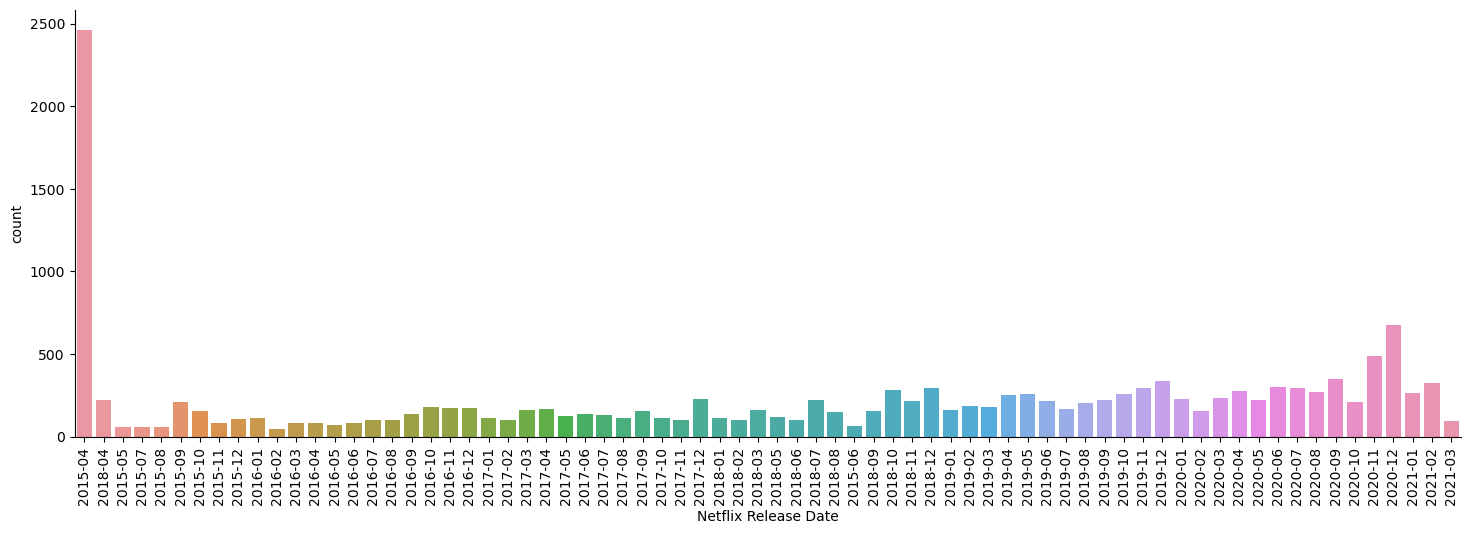

In [46]:
g = sns.catplot(data=df_ym, x="Netflix Release Date", kind="count", aspect=3)
g.set_xticklabels()
g.fig

## Retard entre la sortie en cinéma et la sortie sur Netflix

attention à filtrer